<a href="https://colab.research.google.com/github/justcme/PerformanceSpecs/blob/main/9LDLBarCharts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

OS

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks/LipidPerf/from_Pandas")

Mounted at /content/drive/


Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import index
import pathlib

# DATA

###Average Error by Group

In [ ]:
Ldfs1 = {d.stem: pd.read_csv(d, index_col = 0) for d in pathlib.Path().glob('Old_Criteria/Stats/cL*_means.csv')}
Ldfs1 = {k: Ldfs1[k] for k in sorted(Ldfs1)}
Ldfs2 = {d.stem: pd.read_csv(d, index_col = 0) for d in pathlib.Path().glob('New_Criteria/Stats/L*_means.csv')}
Ldfs2 = {k: Ldfs2[k] for k in sorted(Ldfs2)}

###Best and Worst Case Scenarios

In [ ]:
errorL1 = pd.read_csv("Old_Criteria/Error/errorcL.csv")
errorL2 = pd.read_csv("New_Criteria/Error/errorL.csv")

In [ ]:
errorL1

,Step,Criteria,Scenario,Error Added,ReClassd_1,ReClassd_2,ReClassd_3,ReClassd_4,ReClassd_5,ReClassd_6,...,ReClassd_44,ReClassd_45,ReClassd_46,ReClassd_47,ReClassd_48,ReClassd_49,ReClassd_50,max,min,mean
0,1,old,0.0,BV,6.6,6.0,6.3,6.2,6.4,6.2,...,6.4,6.0,6.4,6.0,6.6,6.5,6.0,6.9,5.5,6.303846
1,2,old,0.1,CV,3.7,3.4,3.4,3.4,3.6,3.4,...,3.5,3.5,3.3,3.4,3.6,3.4,3.3,3.8,2.9,3.411538
2,3,old,0.2,BV + CV,7.0,7.2,7.2,7.3,7.2,6.0,...,6.9,6.6,7.0,6.7,7.3,7.2,6.9,7.7,6.0,7.088462
3,4,old,1.1,PB1 + CV,7.0,7.0,7.2,6.9,7.1,6.9,...,7.1,6.9,7.2,7.2,7.2,6.9,7.0,7.3,6.7,7.051923
4,5,old,1.2,PB1 + BV + CV,9.3,9.9,9.6,9.1,9.6,8.8,...,9.5,9.4,9.1,9.4,9.7,9.6,9.3,10.1,8.8,9.511538
5,6,old,2.1,PB2 + CV,5.4,5.1,5.2,5.1,5.2,5.3,...,5.4,5.3,5.3,4.9,5.3,5.3,5.1,5.6,4.9,5.228846
6,7,old,2.2,PB2 + BV + CV,7.5,7.9,7.7,7.5,7.6,7.2,...,8.0,7.5,7.5,7.4,7.6,7.8,7.6,8.1,7.1,7.628846


#Functions

###Remove values from cells AA, BB, CC

In [ ]:
def CleanMean(dodf):
  clean_dfs = {}
  for k,v in dodf.items():
    df_clean = v.copy()
    X = Y = np.arange(4)
    for x,y in zip(X,Y):
      df_clean.iloc[x,y]=0
    df_clean = df_clean*100
    clean_dfs[f'{k}_clean'] = df_clean
  return clean_dfs

###Create individual stacked bar charts

In [ ]:
def StackBar(df, letter, step, param, RC, coords, error):
  sns.set_theme(context = 'paper', style = 'white', font_scale = 1.3)
  colors = sns.color_palette('deep')
  df.plot(kind = 'bar', stacked = True, color = colors, figsize = (9,6))

  plt.xticks(rotation = 0, horizontalalignment = "center")
  plt.xlabel('New Group')
  plt.ylabel('Original Group (%)',labelpad = 10)
  plt.ylim(top=3)
  #plt.title('Variation in '+param + ' Risk Classification due to ' +error, fontdict = {'fontsize': 20}, pad = 20)
  plt.legend(title = 'Original \n Group', loc = 'best')
  text = str(RC) + '% misclassified'
  plt.annotate(text, xy=(coords), xycoords='axes fraction')
  sns.despine()
  fig = plt.gcf()
  fig.savefig('Figures/Variation_' +letter +str(step) +'barchart_fxn.jpg', dpi = 600)
  return (fig, letter+str(step)+'_barchart.jpg')

#Data Manipulation

In [ ]:
cleandfs_L1 = CleanMean(Ldfs1)
cleandfs_L2 = CleanMean(Ldfs2)

In [ ]:
df_steps = list(range(1,8))
Ltext_coords = [(0.05, 0.93),(0.05, 0.93),(0.05, 0.93),(0.15, 0.93),(0.15, 0.93),(0.25, 0.93),(0.25, 0.93)]

In [ ]:
CRC_L1 =[round(v.sum(axis=1), ndigits = 2) for k,v in cleandfs_L1.items()]
RC_L1 = [round(v.values.sum(), ndigits = 1) for k,v in cleandfs_L1.items()]
CRC_L2 =[round(v.sum(axis=1), ndigits = 2) for k,v in cleandfs_L2.items()]
RC_L2 = [round(v.values.sum(), ndigits = 1) for k,v in cleandfs_L2.items()]

#Create LDL Charts

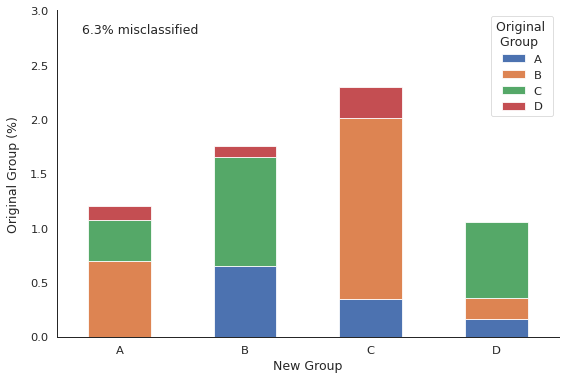

In [ ]:
BVbar_L = StackBar(cleandfs_L1['cL1_means_clean'], 'L', 0, 'LDL-C', RC_L1[0], Ltext_coords[0], 'BV')

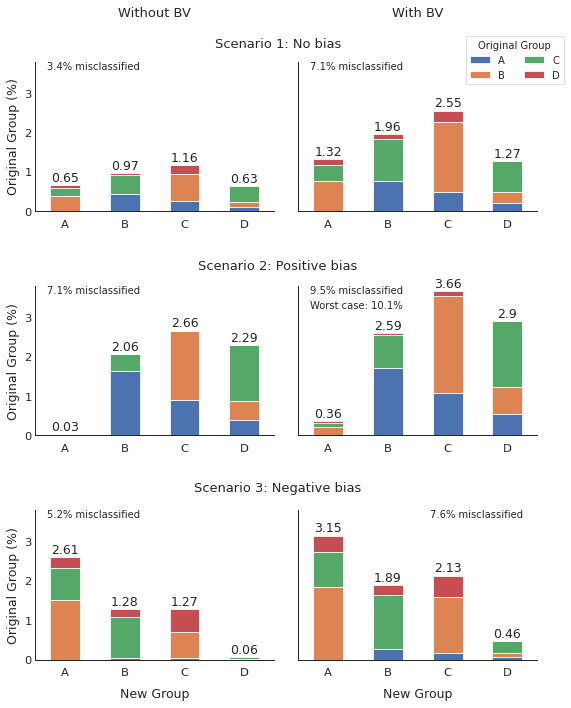

In [ ]:
fig1, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True,
                                                    gridspec_kw={'wspace': 0.1, 'hspace': 0.5})


#fig.suptitle('Variation in Risk Classification due to Old LDL-C Error', fontsize = 15, y= 1)

colors = sns.color_palette('deep')



cleandfs_L1['cL2_means_clean'].plot(ax = ax1, kind = 'bar', stacked = True, legend = False,
                                figsize = (9,11), color = colors, 
                                ylabel = 'Original Group (%)')
cleandfs_L1['cL3_means_clean'].plot(ax = ax2, kind = 'bar', stacked = True,  
                                figsize = (9,11), color = colors)
cleandfs_L1['cL4_means_clean'].plot(ax = ax3, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors, 
                                ylabel = 'Original Group (%)')
cleandfs_L1['cL5_means_clean'].plot(ax = ax4, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors)
cleandfs_L1['cL6_means_clean'].plot(ax = ax5, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors, 
                                rot = 0, xlabel = 'New Group', ylabel = 'Original Group (%)')
cleandfs_L1['cL7_means_clean'].plot(ax = ax6, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                xlabel = 'New Group', rot = 0)

L_coords = [(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.55, 0.95)]
y_offset = 0.1
x_units = [0, 1, 2, 3]

axes = [ax1,ax2,ax3,ax4,ax5,ax6]
for ax,r,c,k in zip(axes, RC_L1[1:], L_coords, CRC_L1[1:]):
  text1 = str(r) + '% misclassified'
  ax.annotate(text1, xy=(c), xycoords='axes fraction', fontsize = 10)
  for h,x in zip(k, x_units):
    ax.text(x, h+y_offset, h, ha = 'center')
  sns.despine()

cols = ['{} BV'.format(col) for col in ['Without','With']]
for ax, col in zip([ax1,ax2], cols):
    ax.set_title(col,pad=45,fontsize = 13)

plt.figtext(0.5,0.91, "Scenario 1: No bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.63, "Scenario 2: Positive bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.35, "Scenario 3: Negative bias", ha="center", va="top", fontsize=13)

ax4.annotate(f"Worst case: {errorL1.loc[4,'max']}%", xy=(0.05, 0.85), xycoords = 'axes fraction', fontsize = 10)
ax5.xaxis.labelpad = 10
ax6.xaxis.labelpad = 10
legend=ax2.legend(title = 'Original Group', loc = (0.7,0.85), fontsize = 10, ncols=2)
plt.setp(legend.get_title(),fontsize=10)

for ax in axes:
  ax.tick_params(axis = 'x', labelbottom=True)
  ax.tick_params(axis = 'y',which = 'both', length=0)
  ax.set_yticks([0,1,2,3])
  ax.set_ylim(0,3.8)

#fig.savefig('Figures/LDL-C_barcharts_old.png', dpi = 600)
fig1.savefig('Figures/LDL-C_barcharts_old.jpg', dpi = 600)

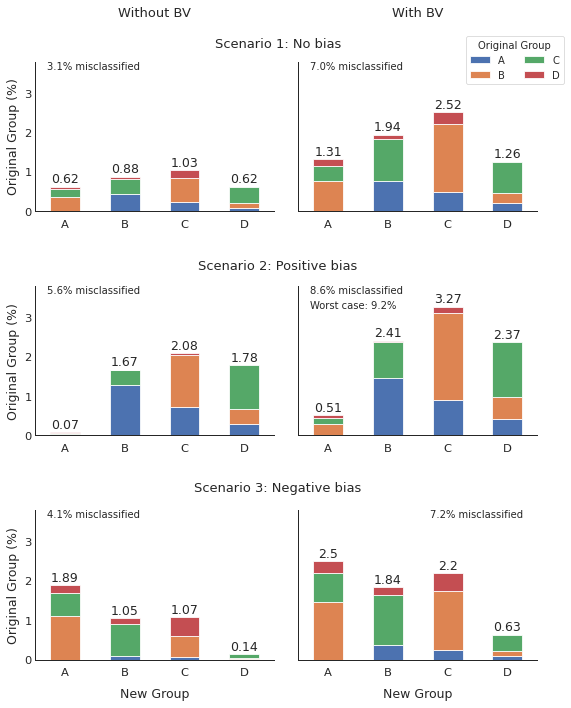

In [ ]:
fig2, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True,
                                                    gridspec_kw={'wspace': 0.1, 'hspace': 0.5})


#fig.suptitle('Variation in Risk Classification due to Old LDL-C Error', fontsize = 15, y= 1)

colors = sns.color_palette('deep')



cleandfs_L2['L2_means_clean'].plot(ax = ax1, kind = 'bar', stacked = True, legend = False,
                                figsize = (9,11), color = colors, 
                                ylabel = 'Original Group (%)')
cleandfs_L2['L3_means_clean'].plot(ax = ax2, kind = 'bar', stacked = True,  
                                figsize = (9,11), color = colors)
cleandfs_L2['L4_means_clean'].plot(ax = ax3, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors, 
                                ylabel = 'Original Group (%)')
cleandfs_L2['L5_means_clean'].plot(ax = ax4, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors)
cleandfs_L2['L6_means_clean'].plot(ax = ax5, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors, 
                                rot = 0, xlabel = 'New Group', ylabel = 'Original Group (%)')
cleandfs_L2['L7_means_clean'].plot(ax = ax6, kind = 'bar', stacked = True, legend  = False,
                                figsize = (9,11), color = colors,
                                xlabel = 'New Group', rot = 0)

L_coords = [(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.05, 0.95),(0.55, 0.95)]
y_offset = 0.1
x_units = [0, 1, 2, 3]

axes = [ax1,ax2,ax3,ax4,ax5,ax6]
for ax,r,c,k in zip(axes, RC_L2[1:], L_coords, CRC_L2[1:]):
  text1 = str(r) + '% misclassified'
  ax.annotate(text1, xy=(c), xycoords='axes fraction', fontsize = 10)
  for h,x in zip(k, x_units):
    ax.text(x, h+y_offset, h, ha = 'center')
  sns.despine()

cols = ['{} BV'.format(col) for col in ['Without','With']]
for ax, col in zip([ax1,ax2], cols):
    ax.set_title(col,pad=45,fontsize = 13)

plt.figtext(0.5,0.91, "Scenario 1: No bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.63, "Scenario 2: Positive bias", ha="center", va="top", fontsize=13)
plt.figtext(0.5,0.35, "Scenario 3: Negative bias", ha="center", va="top", fontsize=13)

ax4.annotate(f"Worst case: {errorL2.loc[4,'max']}%", xy=(0.05, 0.85), xycoords = 'axes fraction', fontsize = 10)
ax5.xaxis.labelpad = 10
ax6.xaxis.labelpad = 10
legend=ax2.legend(title = 'Original Group', loc = (0.7,0.85), fontsize = 10, ncols=2)
plt.setp(legend.get_title(),fontsize=10)

for ax in axes:
  ax.tick_params(axis = 'x', labelbottom=True)
  ax.tick_params(axis = 'y',which = 'both', length=0)
  ax.set_yticks([0,1,2,3])
  ax.set_ylim(0,3.8)

#fig.savefig('Figures/LDL-C_barcharts_old.png', dpi = 600)
fig2.savefig('Figures/LDL-C_barcharts_new.jpg', dpi = 600)